In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import os 
import jax

In [ ]:
project_dir=os.environ.get("SCRATCH")+"/seed3_wallb"
print(project_dir)


lalive=jnp.load(project_dir + "/train/data/alive.npy")
lfood=jnp.load(project_dir + "/train/data/food.npy")
l_movement=jnp.load(project_dir + "/train/data/movement.npy")
l_valid=jnp.load(project_dir + "/train/data/valid.npy")
l_expectancy=jnp.load(project_dir + "/train/data/expectancy.npy")
l_death=jnp.load(project_dir + "/train/data/death.npy")
l_offspring=jnp.load(project_dir + "/train/data/offspring.npy")
l_offspring_per=jnp.load(project_dir + "/train/data/offspring_per_indiv.npy")
l_food_cons_per=jnp.load(project_dir + "/train/data/food_cons_per_indiv.npy")
spx=jnp.load(project_dir + "/train/data/spx.npy")
spfx=jnp.load(project_dir + "/train/data/spfx.npy")
lx=jnp.load(project_dir + "/train/data/lx.npy")
lfx=jnp.load(project_dir + "/train/data/lfx.npy")


In [ ]:
def place(i,a,l_movement,valid):
    a=a.at[i,l_movement[i]].add(valid[i])

    return a
place_fn=jax.jit(place)


In [ ]:
nb_gens=1000
n=nb_gens*20
a=jnp.zeros((n,51))
l_movement=l_movement.astype(jnp.int32)

valid=(l_valid>0).astype(jnp.int32)
for i in range(n):
    a=place_fn(i,a,l_movement,valid)


In [ ]:
cut=10
st=100*1000
stb=20*1000
stc=2*1000


for c in range(10):
        plt.plot(400-lx[c*(st//cut):(c+1)*(st//cut)],label="avg x position")
        plt.plot(400-lfx[c*(st//cut):(c+1)*(st//cut)],label="avg x food")
        plt.ylim(0,400)
        plt.legend()
        plt.show()



        plt.plot(lalive[c*(st//cut):(c+1)*(st//cut)])
        plt.show()

        
        plt.plot(lfood[c*(st//cut):(c+1)*(st//cut)])
        plt.show()

        plt.plot(l_expectancy[c*(stc//cut):(c+1)*(stc//cut)])
        plt.show()

        plt.plot(l_death[c*(stc//cut):(c+1)*(stc//cut)])
        plt.show()

        plt.plot(l_offspring[c*(stc//cut):(c+1)*(stc//cut)])
        plt.show()

        plt.plot(l_offspring[c*(stc//cut):(c+1)*(stc//cut)]/(lalive[::50][c*(stc//cut):(c+1)*(stc//cut)]+1e-10))
        plt.show()
        plt.plot(l_offspring_per[c*(stc//cut):(c+1)*(stc//cut)])
        plt.title("offspring_per")
        plt.show()

        plt.plot(l_food_cons_per[c*(stc//cut):(c+1)*(stc//cut)])
        plt.title("food_conf_per")
        plt.show()





        plt.imshow(spx[:,c*(st//cut):(c+1)*(st//cut)]*4, interpolation='nearest', aspect='auto')
        plt.show()



        plt.imshow(spfx[:,c*(st//cut):(c+1)*(st//cut)]*4, interpolation='nearest', aspect='auto')
        plt.show()

        

        plt.scatter(jnp.ravel(l_valid[c*(stb//cut):(c+1)*(stb//cut)])[l_valid[c*(stb//cut):(c+1)*(stb//cut)].ravel()>0],jnp.ravel(l_movement[c*(stb//cut):(c+1)*(stb//cut)])[l_valid[c*(stb//cut):(c+1)*(stb//cut)].ravel()>0],s=0.001)
        plt.show()


        plt.imshow(a[c*(stb//cut):(c+1)*(stb//cut)].T, interpolation='nearest', aspect='auto')
        plt.show()

        plt.imshow(jnp.log(a[c*(stb//cut):(c+1)*(stb//cut)]+1).T, interpolation='nearest', aspect='auto')
        plt.show()
        
        
        

            



In [ ]:
c=7
cut=50

for c in range(cut):
    plt.plot(400-lx[c*(st//cut):(c+1)*(st//cut)],label="avg x position")
    plt.plot(400-lfx[c*(st//cut):(c+1)*(st//cut)],label="avg x food")
    #plt.ylim(0,400)
    plt.legend()
    plt.show()


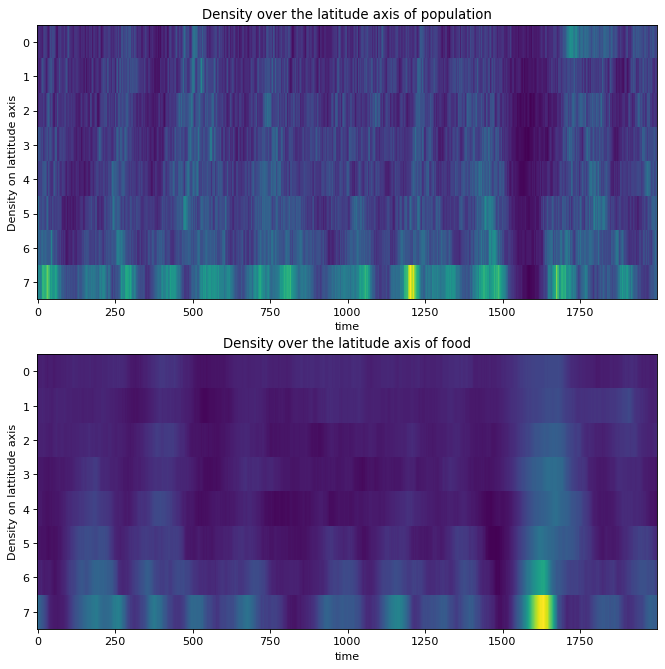

In [67]:
c=2
cut=50
plt.figure(figsize=(10, 10), dpi=80)
ax=plt.subplot(2, 1, 1)
plt.imshow(spx[:,c*(st//cut):(c+1)*(st//cut)]*4, interpolation='nearest', aspect='auto')
ax.set_title("Density over the latitude axis of population")
plt.xlabel("time")
plt.ylabel("Density on lattitude axis")
ax=plt.subplot(2, 1, 2)

plt.imshow(spfx[:,c*(st//cut):(c+1)*(st//cut)]*4, interpolation='nearest', aspect='auto')
ax.set_title("Density over the latitude axis of food")
plt.xlabel("time")
plt.ylabel("Density on lattitude axis")
plt.show()

In [69]:
st=100*1000
stb=20*1000
stc=2*1000
cut=50

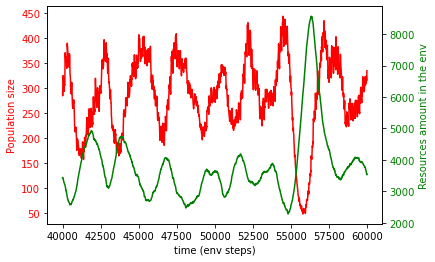

In [72]:
c=2




fig, ax1 = plt.subplots()
color = 'red'

ax1.set_xlabel('time (env steps)')
ax1.set_ylabel('Population size', color=color)
ax1.plot(jnp.linspace(c*(20*1000),(c+1)*(20*1000),(st//cut)),lalive[c*(st//cut):(c+1)*(st//cut)], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Resources amount in the env', color=color)
ax2.plot(jnp.linspace(c*(20*1000),(c+1)*(20*1000),(st//cut)),lfood[c*(st//cut):(c+1)*(st//cut)], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


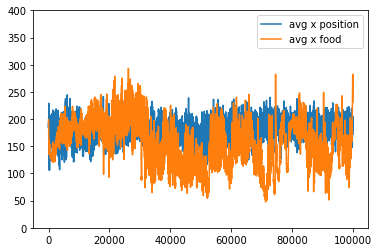

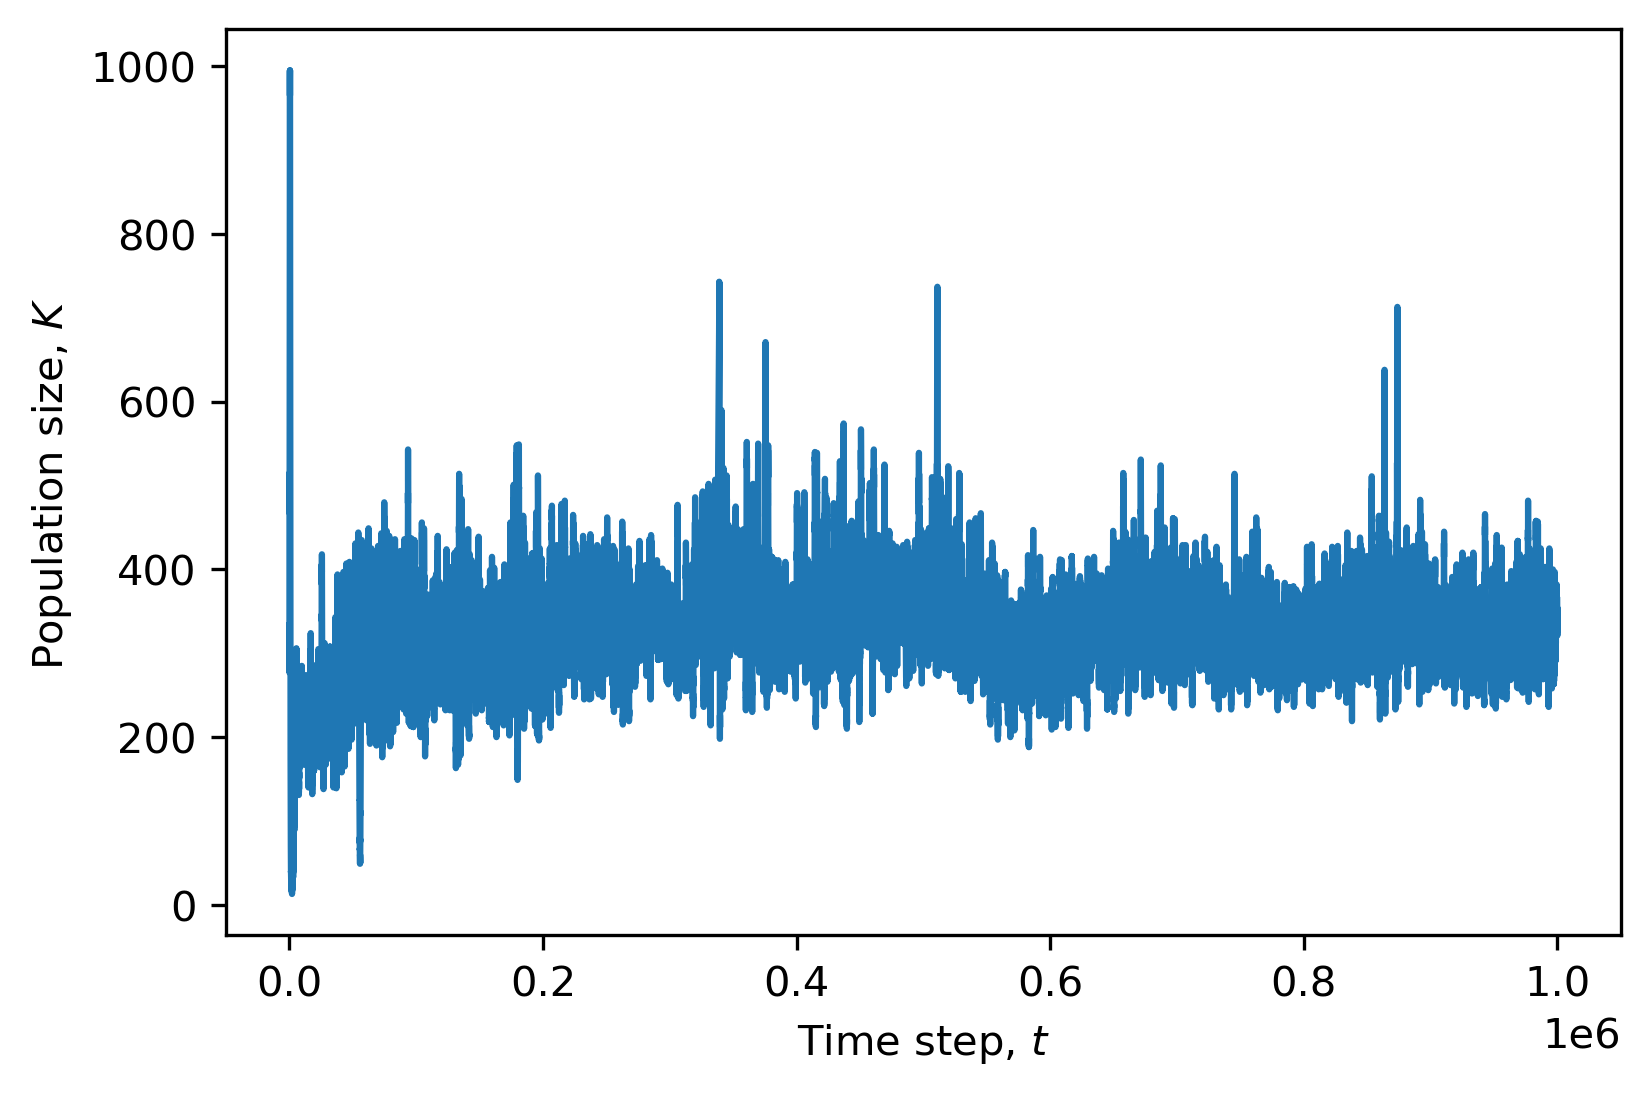

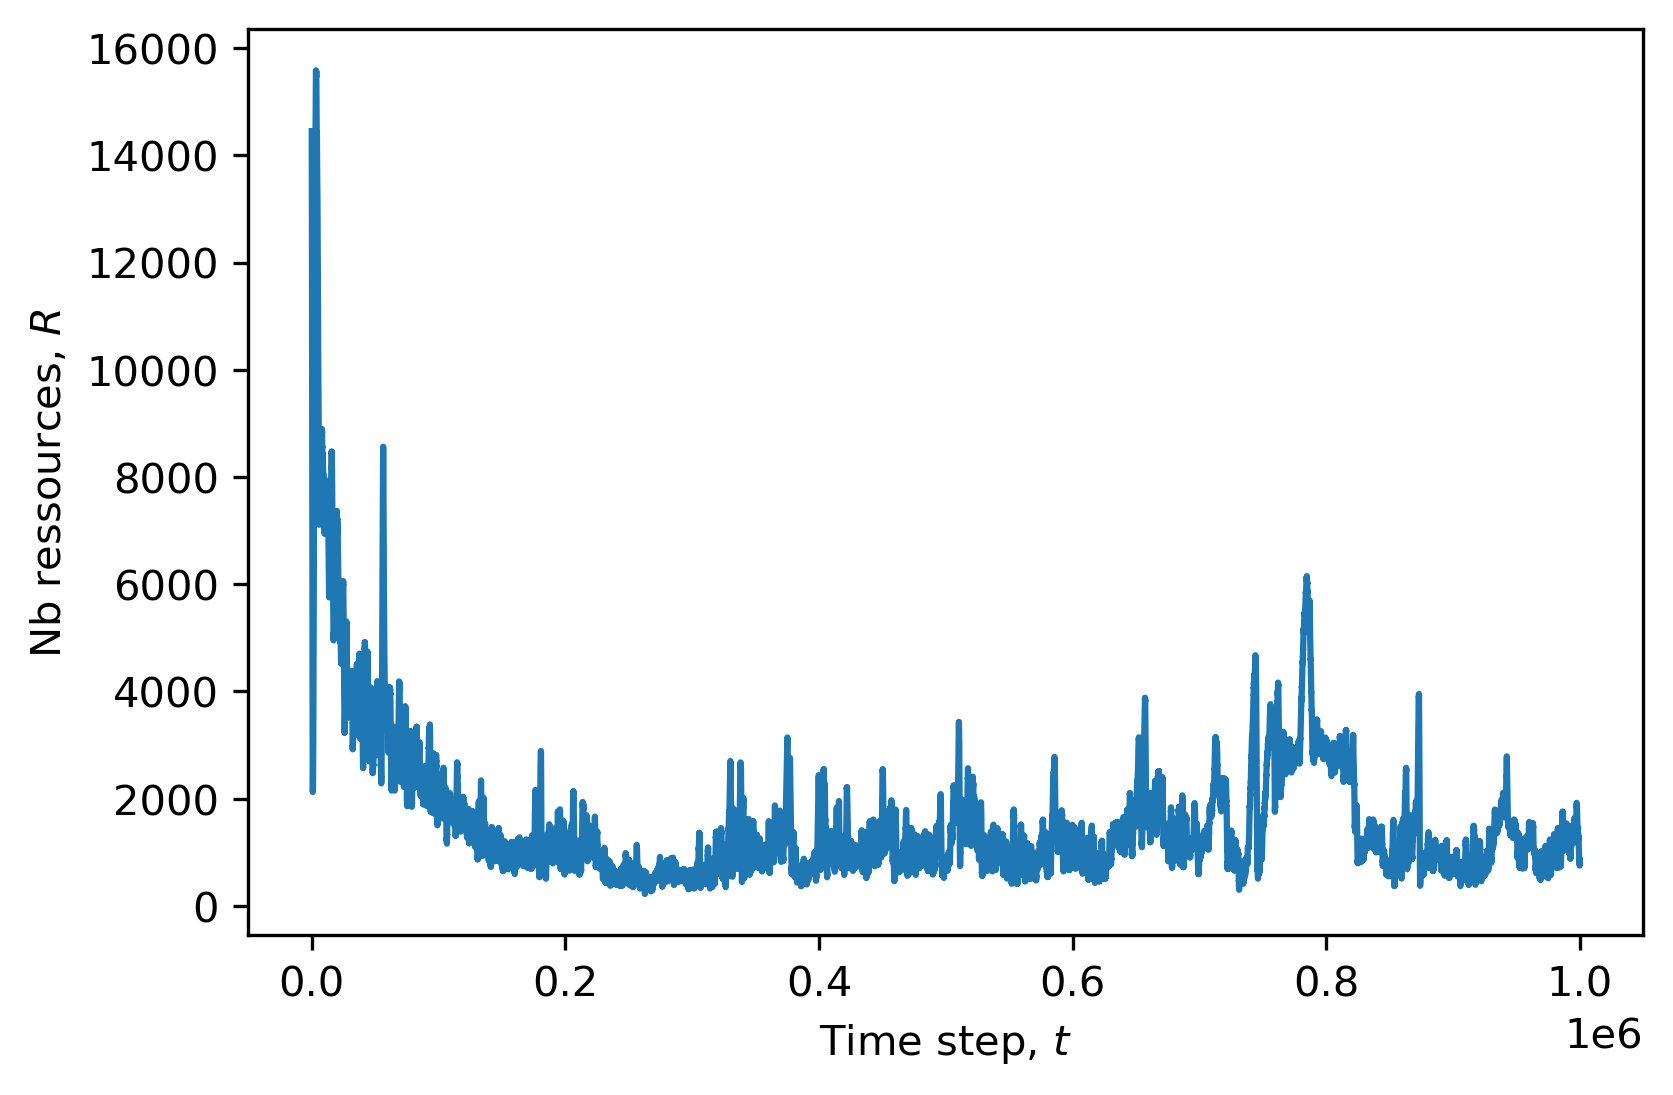

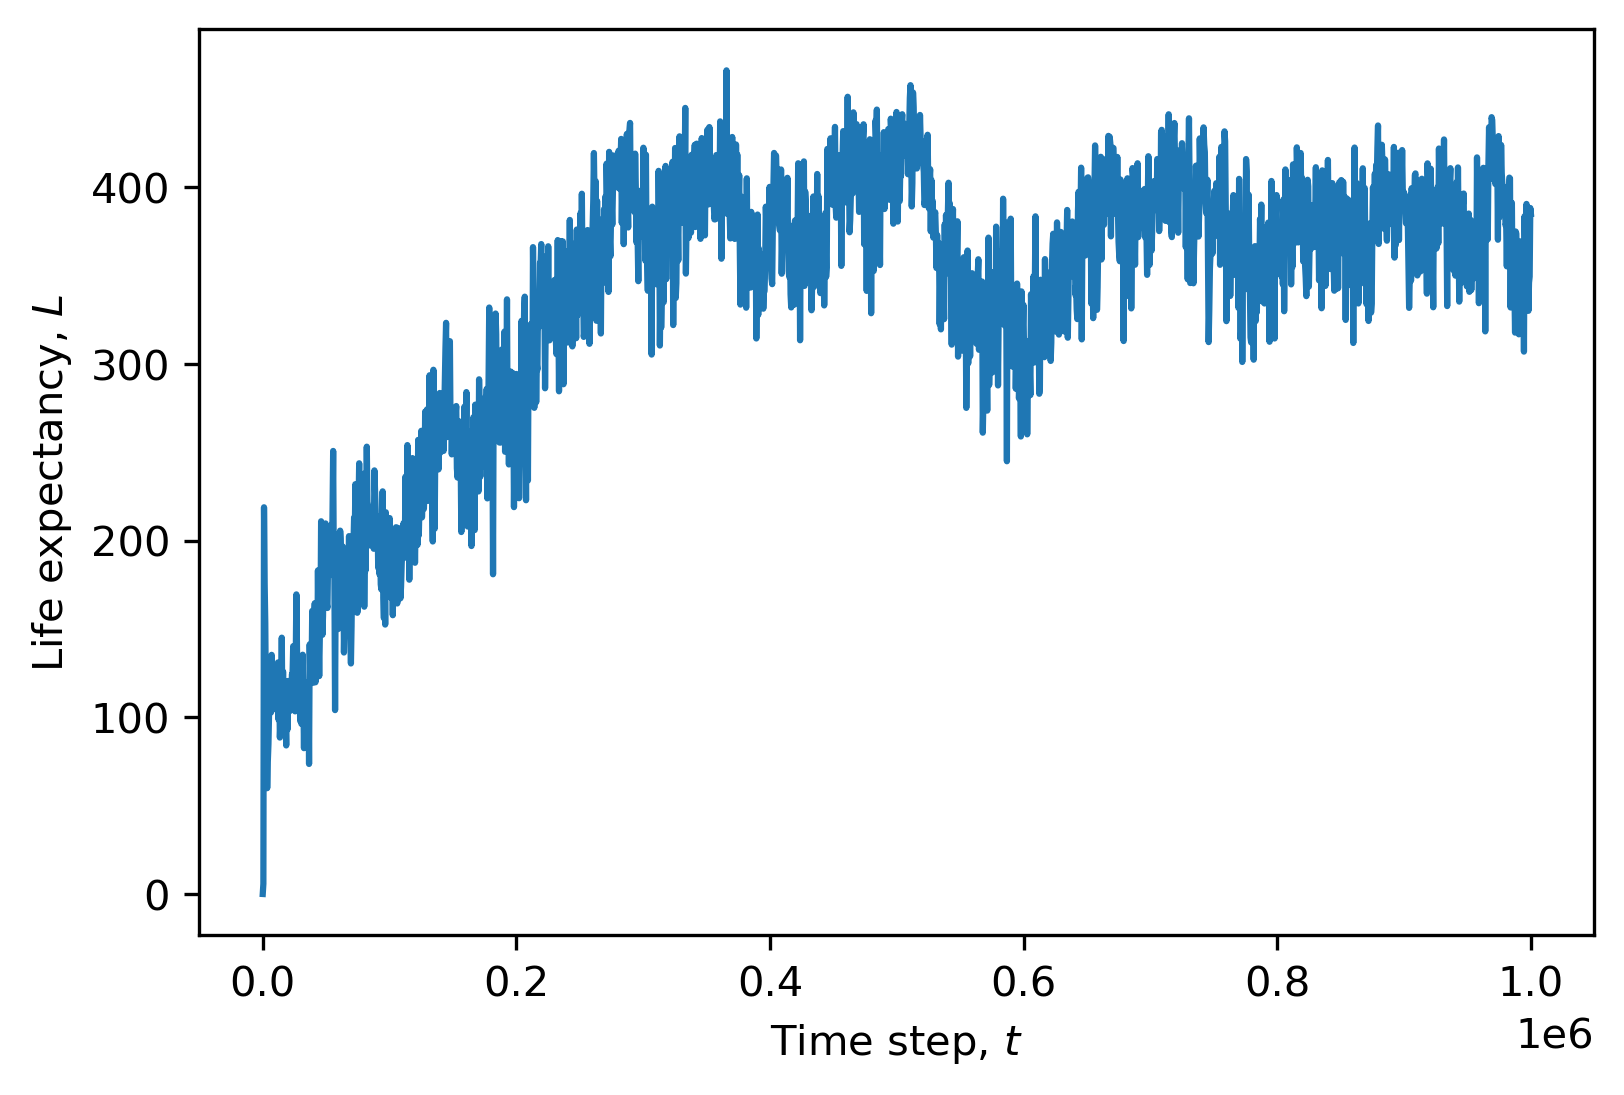

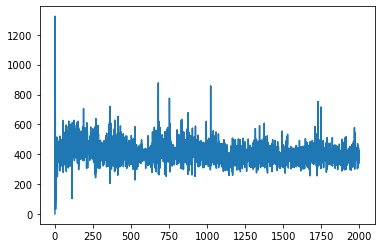

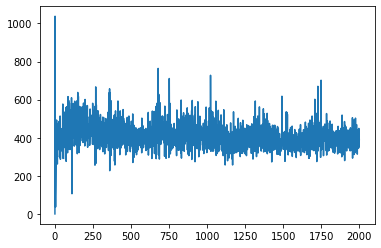

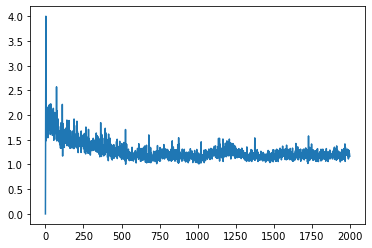

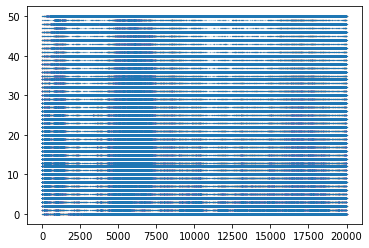

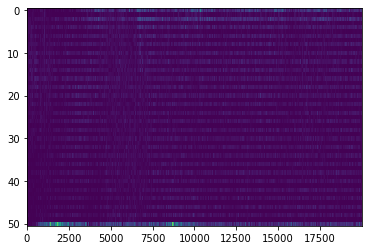

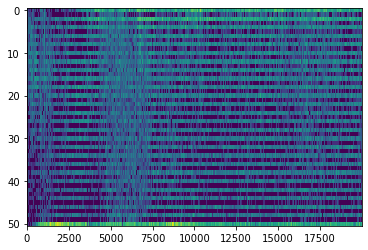

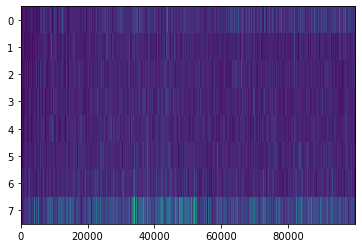

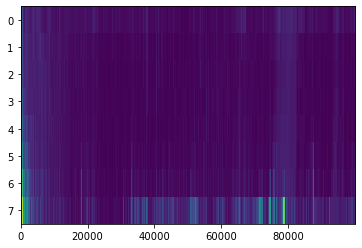

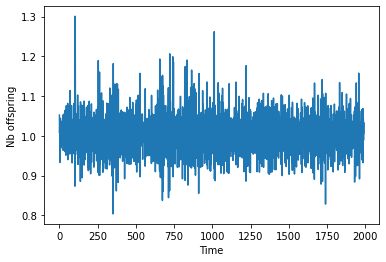

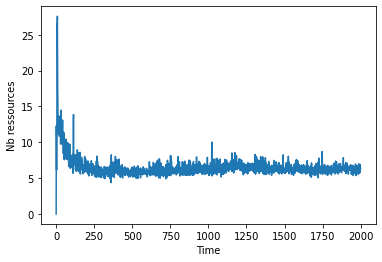

In [90]:
plt.plot(400-lx,label="avg x position")
plt.plot(400-lfx,label="avg x food")
plt.ylim(0,400)
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.plot(jnp.linspace(0,1000*1000,st),lalive)
#plt.title("Population size")
plt.ylabel("Population size, $K$")
plt.xlabel("Time step, $t$")
plt.show()

plt.figure(dpi=300)
plt.plot(jnp.linspace(0,1000*1000,st),lfood)
#plt.title("Number of ressources")
plt.ylabel("Nb ressources, $R$")
plt.xlabel("Time step, $t$")
plt.show()


plt.figure(dpi=300)
plt.plot(jnp.linspace(0,1000*1000,stc),l_expectancy)
#plt.title("Expectancy")
plt.ylabel("Life expectancy, $L$")
plt.xlabel("Time step, $t$")
plt.show()

plt.plot(l_death)
plt.show()

plt.plot(l_offspring)
plt.show()

plt.plot(l_offspring/(lalive[::50]+1e-10))
plt.show()



plt.scatter(jnp.ravel(l_valid)[l_valid.ravel()>0],jnp.ravel(l_movement)[l_valid.ravel()>0],s=0.001)
plt.show()

plt.imshow(a.T, interpolation='nearest', aspect='auto')
plt.show()

plt.imshow(jnp.log(a+1).T, interpolation='nearest', aspect='auto')
plt.show()




plt.imshow(spx*4, interpolation='nearest', aspect='auto')
plt.show()



plt.imshow(spfx*4, interpolation='nearest', aspect='auto')
plt.show()

plt.plot(l_offspring_per[10:])
#plt.title("Offspring per agent in a lifetime")
plt.ylabel("Nb offspring")
plt.xlabel("Time")

plt.show()

plt.plot(l_food_cons_per)
#plt.title("Food consumed per agent in a lifetime")
plt.ylabel("Nb ressources")
plt.xlabel("Time")
plt.show()


In [91]:
nb_gens=1000
n=nb_gens*20
a=jnp.zeros((n,51))
l_movement=l_movement.astype(jnp.int32)

valid=(l_valid>0).astype(jnp.int32)
for i in range(n):
    a=place_fn(i,a,l_movement,valid)


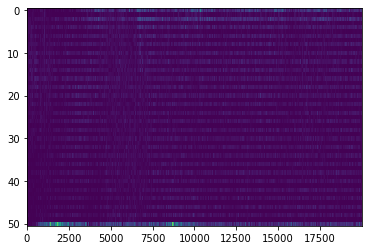

In [75]:
plt.imshow(a.T, interpolation='nearest', aspect='auto')
plt.show()

In [92]:
b=jnp.zeros((n,17))
for i in range(17):
    b=b.at[:,i].set(a[:,i*3:(i+1)*3].sum(axis=1))
    
c=jnp.zeros((n-49,17))
for i in range(17):
    c=c.at[:,i].set((jnp.convolve(b[:,i],jnp.ones(50)/50,mode="valid")))

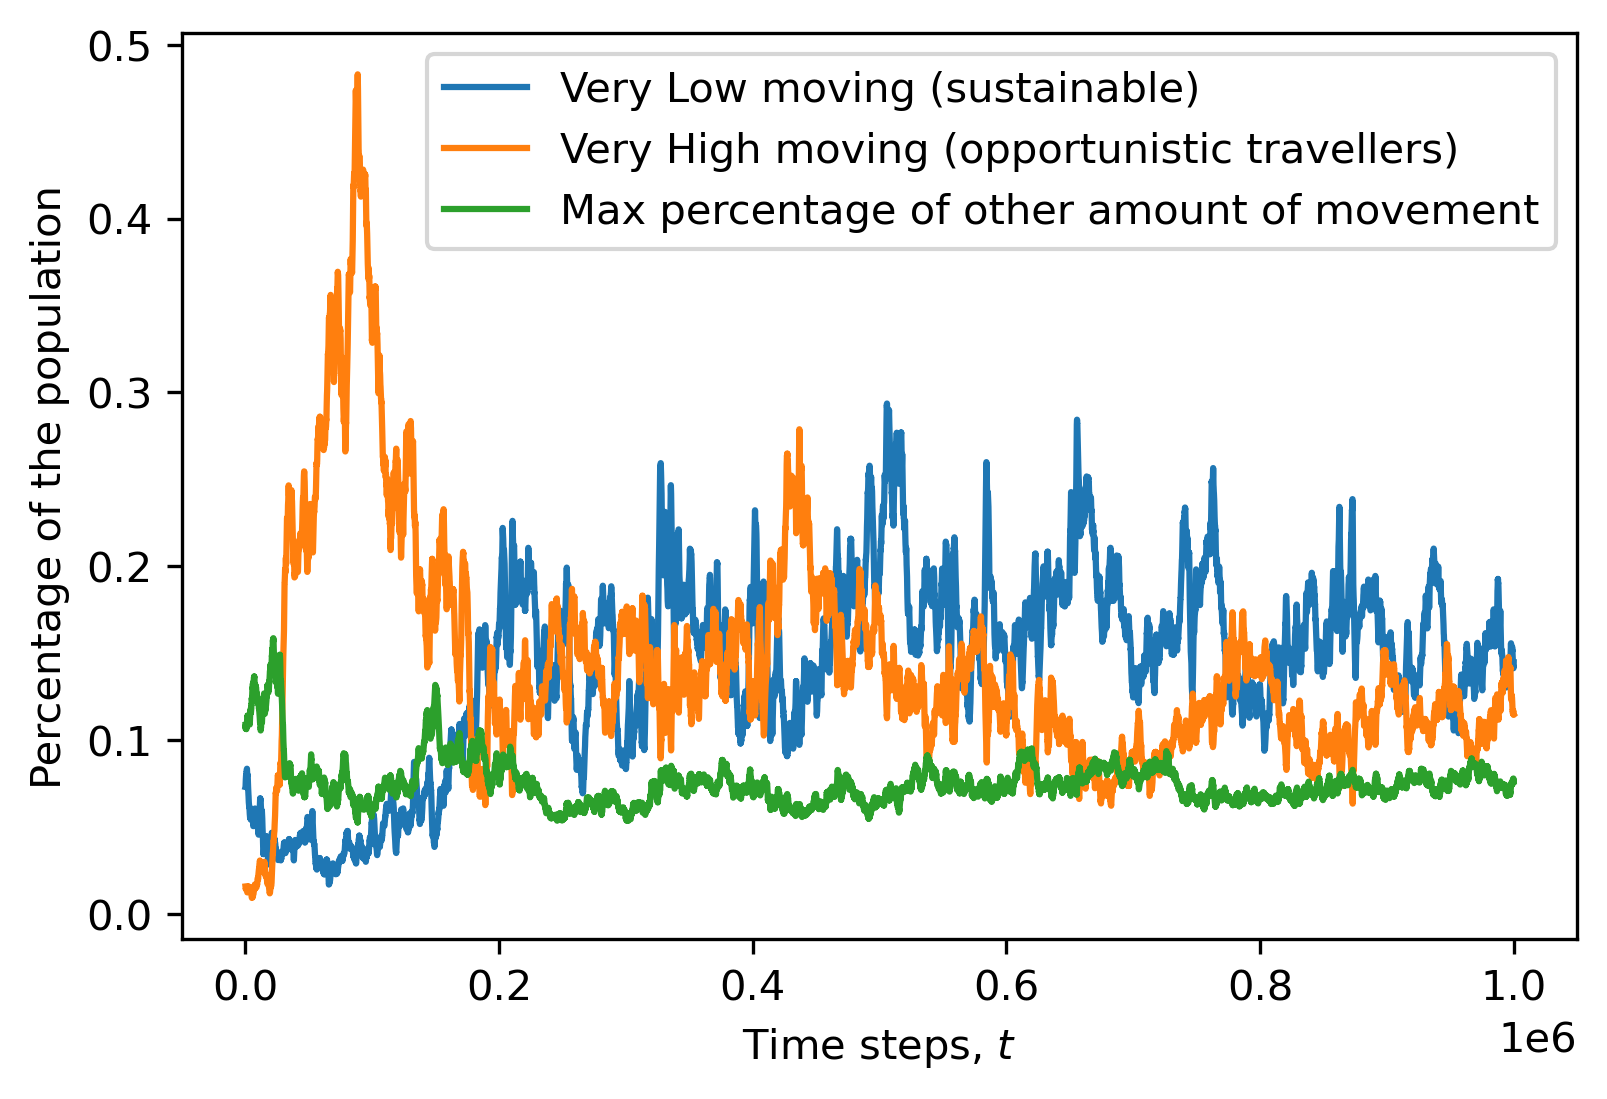

In [93]:
plt.figure(dpi=300)
for i in [0,16]:
    if(i==0):
        label="Very Low moving (sustainable)"
    else:
        label="Very High moving (opportunistic travellers)"
    plt.plot(jnp.linspace(0,1e6,n-99),(c[:,i]/(c.sum(axis=1)+1e-10))[50:],label=label)

plt.plot(jnp.linspace(0,1e6,n-99),(jnp.max(c[:][:,1:16],axis=1)/(c.sum(axis=1)+1e-10))[50:],label="Max percentage of other amount of movement")
plt.xlabel("Time steps, $t$")
plt.ylabel("Percentage of the population")

plt.legend()
plt.savefig("a.pdf")
plt.show()

Text(0.5, 0, 'time')

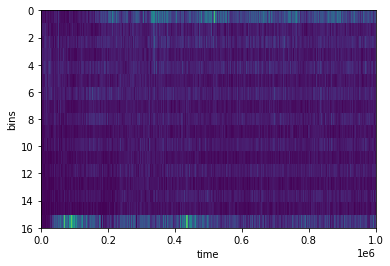

In [79]:
plt.imshow(b.T, interpolation='nearest', aspect='auto',extent=[0,1e6,16,0])

plt.ylabel("bins")
plt.xlabel("time")

In [80]:
c=jnp.zeros((n-49,17))
for i in range(17):
    c=c.at[:,i].set((jnp.convolve(b[:,i],jnp.ones(50)/50,mode="valid")))

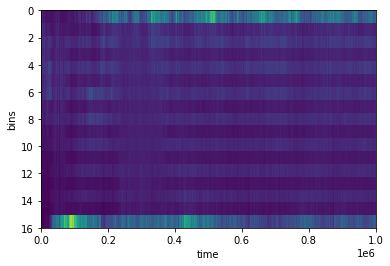

In [81]:

fig=plt.imshow(c.T, interpolation='nearest', aspect='auto',extent=[0,1e6,16,0])
plt.ylabel("bins")
plt.xlabel("time")
ax = plt.gca()
